# SIRモデル

## 感染ダイナミクス (連続)

$$
\begin{align}
  \dfrac{\mathrm{d} S(t)}{\mathrm{d}t} &= - \beta S(t)I(t)
  \\
  \dfrac{\mathrm{d} I(t)}{\mathrm{d}t} &= (\beta S(t) - \gamma)I(t)
  \\
  \dfrac{\mathrm{d} R(t)}{\mathrm{d}t} &= \gamma I(t)
\end{align}
$$


## 感染ダイナミクス (離散)


$$
\begin{align}
   S(t+\Delta t) &= S(t) \mathrm{e}^{-\beta \Delta t I(t)}
  \\
  I(t+\Delta t) &= I(t)+ S(t) (1-\mathrm{e}^{-\beta \Delta t I(t)}) - \gamma \Delta t I(t)
  \\
  R(t+\Delta t) &= R(t) + \gamma \Delta t I(t)
\end{align}
$$

## 定式化およびアルゴリズム詳細

* [report.pdf](report.pdf)

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
import SIR_Solver as SS

plt.style.use('default')

In [3]:
prm = SS.Prameter(R0=2.0, gamma=1)
dt = 0.1
model = SS.Model(prm=prm, I=0.001, T=20, dt=dt)
model_Euler = SS.Model(prm=prm, I=0.001, T=20, dt=dt)
model_Heun = SS.Model(prm=prm, I=0.001, T=20, dt=dt)
model_Runge_Kutta = SS.Model(prm=prm, I=0.001, T=20, dt=dt)

In [4]:
model.solve_Anly()
model_Euler.solve_Euler()
model_Heun.solve_Heun()
model_Runge_Kutta.solve_Runge_Kutta()

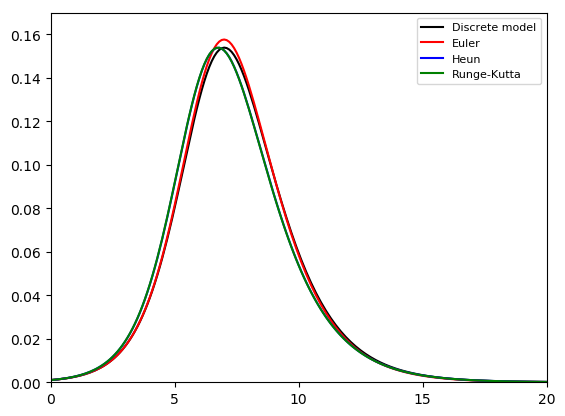

In [5]:

plt.plot(model.I_list, color='black', label='Discrete model')
plt.plot(model_Euler.I_list, color='red', label='Euler')
plt.plot(model_Heun.I_list, color='blue', label='Heun')
plt.plot(model_Runge_Kutta.I_list, color='green', label='Runge-Kutta')

plt.xticks([i*50 for i in range(6)], [i*5 for i in range(6)])
plt.xlim([0,200])
plt.ylim([0.0,0.17])

plt.legend(fontsize=8)